In [1]:
## EDIT:
base_dir = '/glade/work/kjmayer/research/catalyst/TransferLearning/runmean_analysis/artificial_bias/perfectmodel_TLtest/E3SM_analysis/'

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import random
import pandas as pd
import time

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

import sys
sys.path.append(base_dir+'functions/')
from utils import split_retrain
from exp_hp import get_hp

2024-08-14 15:08:02.119044: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0


2024-08-14 15:08:08.771826: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load standardized CESM2-LE

0
Training Members: ['0201']
Validation Member: 0291
Testing Member: 0301
Lead: 14
Region: 30-60N x 170-240E
loading data & saving
made it!
0
228/228 [==============================] - 50s 214ms/step
1
228/228 [==============================] - 105s 460ms/step
2
228/228 [==============================] - 94s 412ms/step
3
228/228 [==============================] - 100s 438ms/step
4
228/228 [==============================] - 107s 470ms/step
5
228/228 [==============================] - 102s 447ms/step
6
228/228 [==============================] - 102s 448ms/step
7
228/228 [==============================] - 111s 486ms/step
8
228/228 [==============================] - 105s 459ms/step
9
228/228 [==============================] - 103s 450ms/step


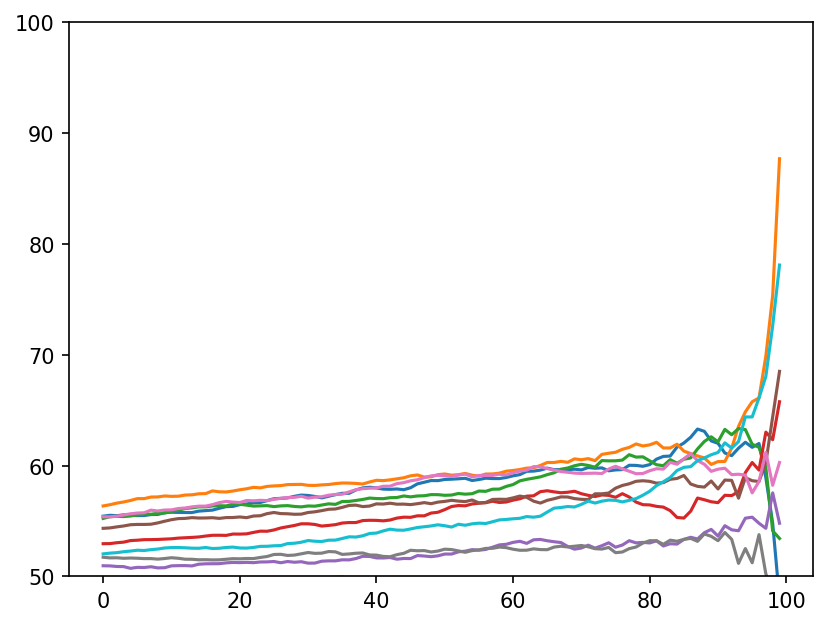

1
Training Members: ['0201', '0211']
Validation Member: 0291
Testing Member: 0301
Lead: 14
Region: 30-60N x 170-240E
loading data & saving
0
236/236 [==============================] - 79s 335ms/step
1
236/236 [==============================] - 60s 254ms/step
2
236/236 [==============================] - 90s 379ms/step
3
236/236 [==============================] - 75s 317ms/step
4
236/236 [==============================] - 64s 272ms/step
5
236/236 [==============================] - 66s 280ms/step
6
236/236 [==============================] - 115s 488ms/step
7
236/236 [==============================] - 115s 487ms/step
8
236/236 [==============================] - 109s 465ms/step
9
236/236 [==============================] - 103s 436ms/step


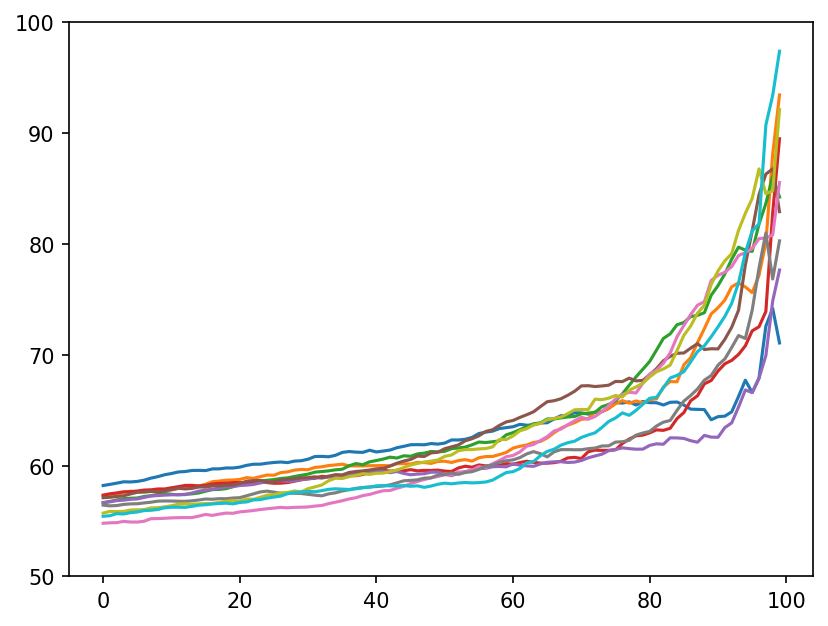

2
Training Members: ['0201', '0211', '0221']
Validation Member: 0291
Testing Member: 0301
Lead: 14
Region: 30-60N x 170-240E
loading data & saving
0
242/242 [==============================] - 115s 476ms/step
1
242/242 [==============================] - 115s 477ms/step
2
242/242 [==============================] - 110s 455ms/step
3
242/242 [==============================] - 83s 344ms/step
4
242/242 [==============================] - 35s 144ms/step
5
242/242 [==============================] - 97s 398ms/step
6
242/242 [==============================] - 112s 461ms/step
7
242/242 [==============================] - 100s 414ms/step
8
242/242 [==============================] - 100s 412ms/step
9
242/242 [==============================] - 119s 489ms/step


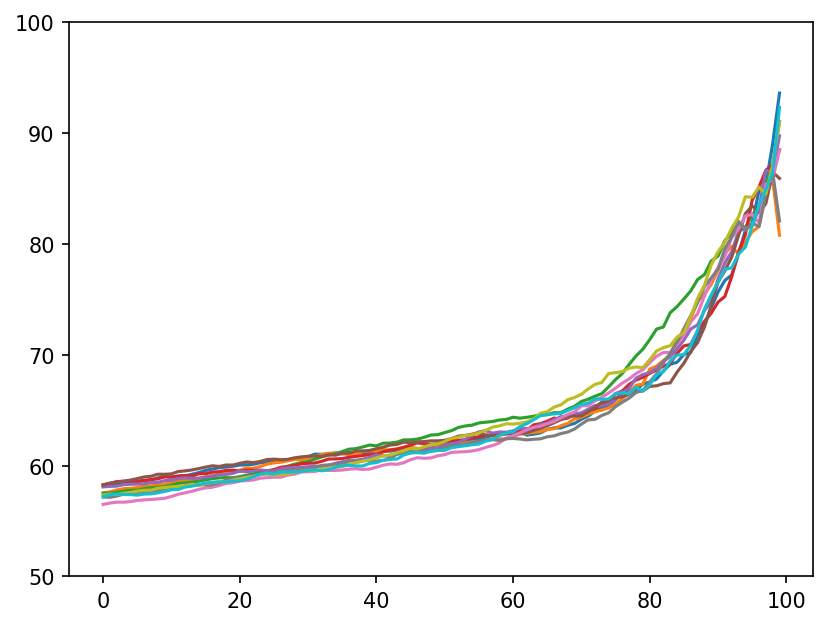

3
Training Members: ['0201', '0211', '0221', '0231']
Validation Member: 0291
Testing Member: 0301
Lead: 14
Region: 30-60N x 170-240E
loading data & saving
0
242/242 [==============================] - 85s 351ms/step
1
242/242 [==============================] - 110s 452ms/step
2
242/242 [==============================] - 83s 341ms/step
3
242/242 [==============================] - 95s 390ms/step
4
242/242 [==============================] - 36s 149ms/step
5
242/242 [==============================] - 35s 146ms/step
6
242/242 [==============================] - 35s 143ms/step
7
242/242 [==============================] - 36s 147ms/step
8
242/242 [==============================] - 35s 145ms/step
9
242/242 [==============================] - 34s 141ms/step


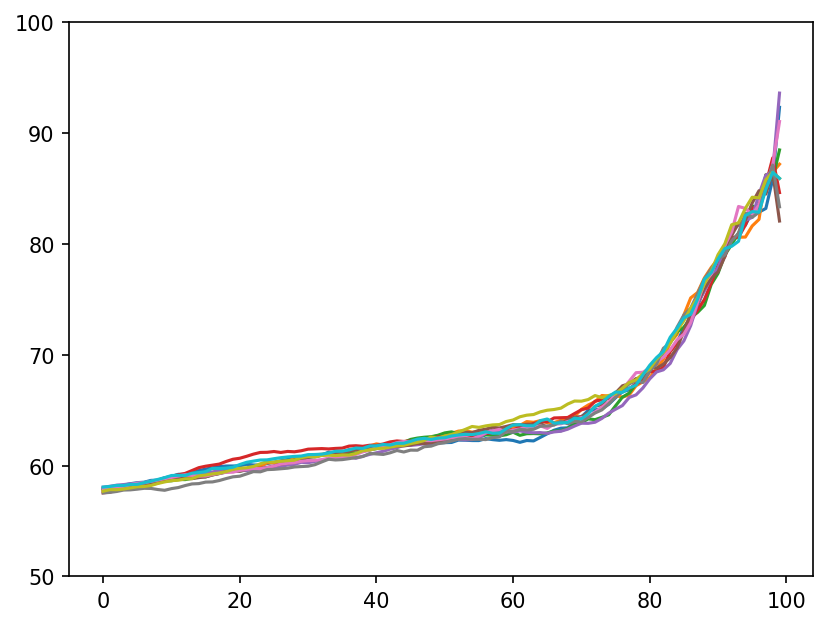

4
Training Members: ['0201', '0211', '0221', '0231', '0241']
Validation Member: 0291
Testing Member: 0301
Lead: 14
Region: 30-60N x 170-240E
loading data & saving
0
239/239 [==============================] - 35s 147ms/step
1
239/239 [==============================] - 34s 143ms/step
2
239/239 [==============================] - 33s 140ms/step
3
239/239 [==============================] - 35s 144ms/step
4
239/239 [==============================] - 34s 143ms/step
5
239/239 [==============================] - 34s 141ms/step
6
233/239 [============================>.] - ETA: 0s

In [ ]:
%%time
EXP_NAME = 'exp2'
EXP_NAME2 = 'exp2_retrain_increase'
hps = get_hp(EXP_NAME)
hps2 = get_hp(EXP_NAME2)

for i_trainmems in np.arange(0,5):
    print(i_trainmems)
    print('Training Members: '+str(hps2['train_mems'][i_trainmems]))
    print('Validation Member: '+str(hps2['val_mems'][0]))
    print('Testing Member: '+str(hps2['test_mems'][0]))
    print('Lead: '+str(hps2['LEAD']))
    print('Region: '+str(hps2['region'][0])+'N x '+str(hps2['region'][1])+'E')

    _, _, X1test, _, _, Y1test,_ = split_retrain(trainmems = hps2['train_mems'][i_trainmems],
                                                  valmem = hps2['val_mems'][0],
                                                  testmem = hps2['test_mems'][0],
                                                  months = [11,12,1,2], # months for X (Y+leadtime are accounted for in function)
                                                  lead = hps2['LEAD'])
    
    #----- SET UP & TRAIN NN -----
    GLOBAL_SEED = hps['GLOBAL_SEED']
    np.random.seed(GLOBAL_SEED)
    random.seed(GLOBAL_SEED)
    tf.random.set_seed(GLOBAL_SEED)

    acc_all = []
    for SEED in range(10):
        print(SEED)
        cnn2fi_name = 'cnn2_'+EXP_NAME+'.'+str(i_trainmems)+'_seed'+str(SEED)+'.h5'
        cnn = tf.keras.models.load_model(base_dir+'CNNcheck/saved_models/'+cnn2fi_name)

        pred = cnn.predict(X1test)
        acc = []
        predconf = np.max(pred,axis=-1)
        predval  = np.argmax(pred,axis=-1)

        for q in range(100):
            iconf = np.where(predconf >= np.percentile(predconf,q=q))
            icorr = np.where(predval[iconf] == Y1test[iconf])

            acc.append((len(icorr[0])/len(iconf[0]))*100)
        plt.plot(acc)
        plt.ylim(50,100)

        acc_all.append(acc)
    plt.show()
    np.save(base_dir+'CNNcheck/confvsacc/confvsacc_cnn2_'+EXP_NAME2+'.'+str(i_trainmems)+'_cnn1_60Eshift_'+EXP_NAME+'.npy', acc_all, allow_pickle=True)
    del cnn, pred, predconf, predval, acc_all, acc, X1test, Y1test